# <u>KDE, MD, IQR (one peak)</u>

This notebook provides worked examples of the [`KDE()`](#kde), [`MD()`](#md), and [`iqr_one_peak()`](#iqr_one_peak) functions from the `lydwhitt-tools` package.

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import lydwhitt_tools as lwt
import numpy as np

In [11]:
df = pd.read_excel('example_data/KDE_ExampleData.xlsx', sheet_name="Sheet1")

## KDE

#### <i>What is a KDE and when would I use it?</i>

The `KDE()` function calculates a <b> Kernel Density Estimate (KDE)</b> for a single variable with distributed data. This tool creates a data-driven bandwidth for a Gaussian KDE using the Improved Sheather–Jones method (ISJ; Sheather and Jones, 1991). In layman’s terms, it examines the density distribution of points for a given variable to identify populations within the data. This is particularly useful for natural datasets, where data are often less precise, and therefore helps inform data-driven, logically consistent conclusions about a particular variable.

> <span style="color:#2c5aa0"><b>Research note:</b> I use this function to identify dominant populations in geochemical datasets such as geothermobarometric depths and temperatures, or populations of geochemical composition. These later inform geological interpretation.</span>

#### <i>How the `KDE()` function works</i>

This function requires R to be installed on your computer, as the core calculations are performed using an R script. In my personal experience, existing Python tools for calculating KDE ISJ bandwidths can be inconsistent with results produced using this R implementation. While I prefer Python as a coding tool, it can sometimes lack the statistical packages needed for this specific task. This approach allows me to keep all processing within a single Python workflow, without having to jump between files or environments on my system.

- **Input:** A <span style="color:#4a78a8"><b>DataFrame</b></span> containing a single numerical 
  <span style="color:#2f7d32"><b>column</b></span>

- **Output** A <span style="color:#4a78a8"><b>DataFrame</b></span> where the <span style="color:#2f7d32"><b>['x'] column </b></span> contains your continuous data variable and <span style="color:#2f7d32"><b>['y'] column </b></span> contains the density distribution curve. 


<span style="color:#b03a2e"><b>Important:</b> The new <span style="color:#4a78a8"><b>DataFrame</b></span> contains only data intended for plotting as a density distribution line and used within the `MD()` function. Any primary statistical analysis on the variable should be completed on the original data <span style="color:#2f7d32"><b>column </b></span>.</span>

**Example usage:**
- <span style="color:#4a78a8"><b>df</b></span> → the input DataFrame  
- <span style="color:#2f7d32"><b>"SiO2_Liq"</b></span> → the column name

In [12]:
kde_df = lwt.KDE(df, "SiO2_Liq")

Text(0, 0.5, 'MgO_Liq')

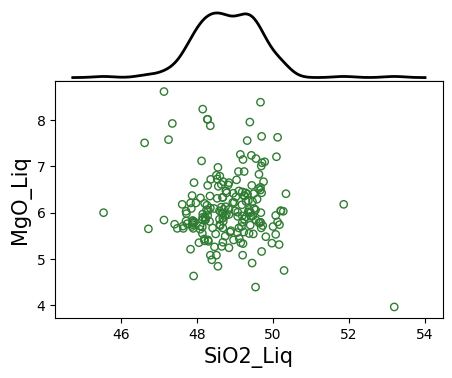

In [13]:
fig = plt.figure(figsize=(5, 4))  # wider figure
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[0.3, 1], hspace=0, wspace=0) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', left=False, labelleft=False)

ax1.plot(kde_df['x'], kde_df['y'], color='k', linewidth=2)
ax2.scatter(df['SiO2_Liq'], df['MgO_Liq'], marker= 'o', edgecolors= '#2f7d32', s=28, facecolors='none')

ax2.set_xlabel('SiO2_Liq', fontsize=15)
ax2.set_ylabel('MgO_Liq', fontsize=15)

<i> The above figure shows the Black KDE line showing the density distribution of the SiO2_Liq data above the plot.

## MD

#### <i>What is the MD and when would I use it?</i>

The `MD()` function calculates the <b> Modal Density (MD)</b>  from a KDE plot. This corresponds to the peak of the density distribution, representing the value at which the data are most concentrated. In practical terms, it identifies the most statistically likely value within a continuous dataset, based on where the highest density of data points occurs.

> <span style="color:#2c5aa0"><b>Research note:</b> I use this function to identify the most likely region of magma storage beneath a volcano after comprehnsive geothermobarometric modelling of numerous analysis points.</span>

#### <i>How the `MD()` function works</i>

- **Input:** A <span style="color:#4a78a8"><b>DataFrame</b></span> produced by the `KDE()` function, containing the density distribution defined by the 
  <span style="color:#2f7d32"><b>['x']</b></span> and 
  <span style="color:#2f7d32"><b>['y']</b></span> columns.

- **Output:** A single numerical value corresponding to the <b>Modal Density (MD)</b>. This value represents the location of the highest peak in the KDE distribution, defined as the x-value at which the density is maximised.

<span style="color:#b03a2e"><b>Important:</b> The `MD()` function returns the dominant peak of the KDE curve by identifying the maximum density value across the distribution. It does not depend on the order of peaks and should always be applied to KDE-derived data rather than directly to the original data <span style="color:#2f7d32"><b>column</b></span>.</span>

**Example usage:**
- <span style="color:#4a78a8"><b>kde_df</b></span> → the KDE output DataFrame  
- <span style="color:#2f7d32"><b>'y'</b></span> → the density distribution used to locate the peak

In [14]:
kde_MD = lwt.MD(kde_df['x'], kde_df['y'], z=False)
kde_MD

48.53139178198241

Text(0, 0.5, 'MgO_Liq')

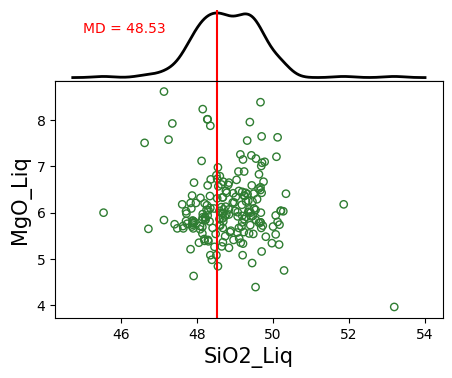

In [15]:
fig = plt.figure(figsize=(5, 4))  # wider figure
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[0.3, 1], hspace=0, wspace=0) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', left=False, labelleft=False)

ax1.plot(kde_df['x'], kde_df['y'], color='k', linewidth=2)
ax1.axvline(kde_MD, color = 'red')
ax1.text(45, 0.3, f"MD = {kde_MD:.2f}", color='red')
ax2.scatter(df['SiO2_Liq'], df['MgO_Liq'], marker= 'o', edgecolors= '#2f7d32', s=28, facecolors='none')
ax2.axvline(kde_MD, color = 'red')

ax2.set_xlabel('SiO2_Liq', fontsize=15)
ax2.set_ylabel('MgO_Liq', fontsize=15)

<i> The above figure shows the Black KDE line showing the density distribution of the SiO2_Liq data above the plot, with the red line indicating the highest peak 'MD' of the data.


## iqr_one_peak

#### <i>What is the MD and when would I use it?</i>

The `iqr_one_peak()` function identifies a single peak location from a KDE curve and then calculates the <b>Interquartile Range (IQR)</b> of the original dataset within the dominant peak. In practical terms, it gives you a likely central value for the dataset (based on the KDE peak) alongside the Q1 and Q3 values, which describe the spread of the data within the dominant peak.

> <span style="color:#2c5aa0"><b>Research note:</b> I use this function to quickly summarise the most likely value and spread of geochemical datasets (for example pressures or temperatures from geothermobarometry) so I can compare populations between volcanoes or sample groups.</span>

#### <i>How the `iqr_one_peak()` function works</i>

- **Input:** A <span style="color:#4a78a8"><b>DataFrame</b></span> containing a single numerical 
  <span style="color:#2f7d32"><b>column</b></span>, and a minimum KDE peak height threshold (<span style="color:#b03a2e"><b>z</b></span>).

- **Output:** A tuple of three numerical values describing the dominant population in the dataset:
  - <b>peak_x</b> = the x-value of the dominant KDE peak (identified using the `MD()` function)
  - <b>Q1</b> = the 25th percentile of the original data <span style="color:#2f7d32"><b>column</b></span>, calculated only from values associated with that peak
  - <b>Q3</b> = the 75th percentile of the original data <span style="color:#2f7d32"><b>column</b></span>, calculated only from values associated with that peak

  output values can be accesed from their tuple via [0], [1], [2].

<span style="color:#b03a2e"><b>Important:</b> The Q1 and Q3 values are calculated from a subset of the original data <span style="color:#2f7d32"><b>column</b></span> that falls within the dominant KDE peak window (estimated using the KDE full width at half maximum). The <span style="color:#b03a2e"><b>z</b></span> value controls which KDE peaks are considered. If <span style="color:#b03a2e"><b>z</b></span> is set too high, the function may return <i>"No peaks found"</i>.</span>

**Example usage:**
- <span style="color:#4a78a8"><b>df</b></span> → the input DataFrame  
- <span style="color:#2f7d32"><b>"SiO2_Liq"</b></span> → the column name  
- <span style="color:#b03a2e"><b>z</b></span> → minimum peak height threshold

In [16]:
IQR = lwt.iqr_one_peak(df, 'SiO2_Liq', z=0)
IQR[0], IQR[1], IQR[2]

(48.53139178198241, 48.31, 49.335)

Text(0, 0.5, 'MgO_Liq')

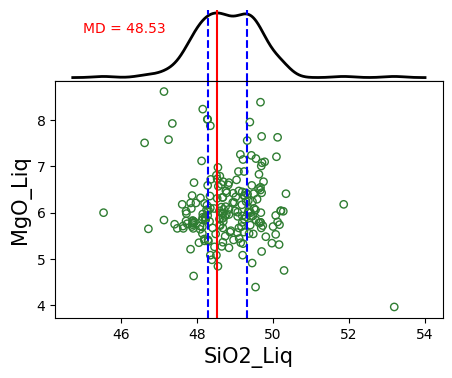

In [17]:
fig = plt.figure(figsize=(5, 4))  # wider figure
gs = gridspec.GridSpec(2, 1, width_ratios=[1], height_ratios=[0.3, 1], hspace=0, wspace=0) 
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)

ax1.spines['left'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.tick_params(axis='y', left=False, labelleft=False)

ax1.plot(kde_df['x'], kde_df['y'], color='k', linewidth=2)
ax1.axvline(kde_MD, color = 'red')
ax1.axvline(IQR[1], color = 'blue', linestyle='--')
ax1.axvline(IQR[2], color = 'blue', linestyle='--')
ax1.text(45, 0.3, f"MD = {kde_MD:.2f}", color='red')
ax2.scatter(df['SiO2_Liq'], df['MgO_Liq'], marker= 'o', edgecolors= '#2f7d32', s=28, facecolors='none')
ax2.axvline(kde_MD, color = 'red')
ax2.axvline(IQR[1], color = 'blue', linestyle='--')
ax2.axvline(IQR[2], color = 'blue', linestyle='--')

ax2.set_xlabel('SiO2_Liq', fontsize=15)
ax2.set_ylabel('MgO_Liq', fontsize=15)

<i> The above figure shows the Black KDE line showing the density distribution of the SiO2_Liq data above the plot, with the red line indicating the highest peak 'MD' of the data and blue dashed lines representing Q! and Q3 around the MD peak of data.